<a href="https://colab.research.google.com/github/AbrahamOtero/MLiB/blob/main/5_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to the Keras API

Keras is a high-level neural networks API, written in Python, and capable of running on top of TensorFlow. TensorFlow is an open-source machine learning and deep learning framework developed by Google. It provides a comprehensive platform for building, training, and deploying machine learning models. Keras allows for easy and fast prototyping of deep learning models on top of TensorFlow.

Ther main Keras API to buld deep learning neural networks is the **Sequential API**, where layers are stacked on top of each other. The **Layers** are the building blocks of neural networks in Keras. The **Dense layer** (tf.keras.layers.Dense), also known as a fully connected layer, is the most common layer used in neural networks. It connects each input neuron to every output neuron.

The **Input** layer in Keras serves as the entry point for the data into a neural network model. It defines the shape and type of the input data that the model will receive. The purpose of the Input layer is to specify the input shape without requiring an actual batch of data. Although it is not mandatory to specify this layer, if it is not specified there is functionality, such as showing a summary of the model, that cannot be done with the model until it has been compiled. The shape parameter receives a  tuple of integers or None objects.

The following code creates a neural network with 3 dense layers with 64 neurons in each layer, and an output layer (the last layer) with three neurons (it could be used for example to predict the class in the iris dataset). It expects 4 features in a one dimensional vector as input (shape=(4,).

```python
model = models.Sequential([
    layers.IOnput(shape=(4,)),
    layers.Dense(64),
    layers.Dense(64),
    layers.Dense(64),
    layers.Dense(3)
])
```

### Activation functions

The **Activation functions** define the output of a layer. Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Keras offers a variety of activation functions to choose from. Here are some of the most commonly used:

* ReLU (Rectified Linear Unit): This is the default activation function in many Keras layers. It returns the input directly if it's positive, otherwise it returns 0. It's computationally efficient and has helped to improve the performance of deep neural networks. It can also be a good choice for the output layer neuron in a regression problem. It is defined as f(x) = max(0, x).
* Sigmoid: The sigmoid function outputs a value between 0 and 1, making it suitable for binary classification problems. However, it suffers from the vanishing gradient problem, which can slow down training. It is defined as f(x) = 1 / (1 + exp(-x)).
* Tanh (Hyperbolic Tangent): Similar to sigmoid, but the output ranges from -1 to 1. It is defined as f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)).
* Leaky ReLU: A variation of ReLU that allows a small gradient when the input is negative, helping to alleviate the dying ReLU problem. It is defined as  f(x) = max(αx, x) where α is a small constant.
* ELU (Exponential Linear Unit): Similar to Leaky ReLU, but the negative part is exponential. It has been shown to outperform ReLU and Leaky ReLU in some cases.
* Softmax: The softmax function converts a vector of real numbers into a probability distribution where the sum of all probabilities equals 1. Each element of the vector represents the probability of the input belonging to a specific class, which is useful when classes are mutually exclusive. It is often a good choice for a multi-class classification problem (such as the iris dataset) with  the categorical_crossentropy or sparse_categorical_crossentropy loss functions. For a binary classification problem we could use the Sigmoid or Tanh functions with the binary_crossentropy los function.  Given a vector z = [z1, z2, ..., zn] of n real-valued scores, the softmax fis defined as: Softmax(zi) = exp(zi) / sum(exp(zj) for j=1 to n).

When creating a Layer we can indicate which activation function we want. If not, ReLU will be used by default.


```python
model = models.Sequential([
    layers.IOnput(shape=(4,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
```

### Compiling the Model

Before training, you need to compile the model. This step includes specifying the:

* Loss function: The function that the model will try to minimize. Common loss functions are mean_squared_error for regression, categorical_crossentropy and  sparse_categorical_crossentropy for multiclass classification, and binary_crossentropy for binary classification.
* Optimizer: The algorithm that adjusts the model’s weights. Popular choices are adam, sgd, and rmsprop.
* Metrics: Performance measures to compute such as accuracy or mean squared error.

The categorical_crossentropy loss function expects the target labels to be one-hot encoded. One-hot encoding transforms categorical labels into a binary matrix representation where each label is represented by a vector with a 1 in the position corresponding to the class index and 0s elsewhere.

If you have 3 classes (e.g., A, B, C), the labels might look like this:

* Class A: [1, 0, 0]
* Class B: [0, 1, 0]
* Class C: [0, 0, 1]

You need to use categorical_crossentropy when your labels are in one-hot encoded format.

On the other hand, the sparse_categorical_crossentropy loss function expects the target labels to be integer-encoded. In this format, each label is represented by an integer corresponding to the class index.

Using the same 3 classes (A, B, C), the labels would be:

* Class A: 0
* Class B: 1
* Class C: 2

You need to use sparse_categorical_crossentropy when your labels are in integer format, and you don't want to convert them to one-hot encoded vectors.

```python

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

### Training the Model
To train the model, use the **fit** method, where you specify the input data, the labels, and training parameters like the number of epochs and batch size.

```python
model.fit(x_iris, y_iris, epochs=5, batch_size=64)
```

### Evaluating and Predicting
After training, you can evaluate the model on test data using **evaluate**, and make predictions on new data using **predict**.

```python
test_loss, test_acc = model.evaluate((X_iris_test, (y_iris_test)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(X_iris_test)
print(predictions[0])
```

## My first Keras Neural Network

We import the libraries that we are going to need:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We load the Iris data set:

In [2]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/iris.csv'
iris = pd.read_csv(url)

The class of the iris dataset is text ("object"):

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We need to encode it properly for Keras using **LabelEcoder**. Each class will be represented by an integer; i.e.; it will be integer-encoded:

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
iris['class'] = le.fit_transform(iris['class'])

iris.info(())

iris['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,count
class,
0,50
1,50
2,50


Using the sequential API we will build a network with 3 layers with 50 neurons in each layer and using the Relu activation function. Since there are 3 possible classes in the iris dataset, the output layer will have 3 neurons. In order for the probability of belonging to each of the classes for each instance at add up to 1, we will use the Sofmax activation function in this output layer.

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import tensorflow as tf

# Split data into features (X) and labels (y)
X = iris.drop('class', axis=1)
y = iris['class']

#Sets all random seeds (Python, NumPy, and TF)
tf.keras.utils.set_random_seed(42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])


Since we have represented the class as an integer that corresponds to a different index of the class values (integer-encoded), the loss function that we must use is sparse_categorical_crossentropy. The optimizer that we will use is adam with default parameters. When compiling the model, we will indicate these parameters, as well as any additional metrics we want to calculate during training (accuracy in this example):

In [6]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Evaluate the model. The method evaluate always returns the training loss, plus the
# additional metrics (accuracy in our case) that have been indicated.
# _ will be the loss; this is a typical throw away name for Python variable (it will be asigned the loss)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2423 - loss: 1.1287
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4478 - loss: 0.9653  
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6583 - loss: 0.8924
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6653 - loss: 0.8173 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6702 - loss: 0.7463  
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7453 - loss: 0.6760  
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8509 - loss: 0.6148 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8509 - loss: 0.5631 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 0.5186  
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9239 - loss: 0.4807 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9311 - loss: 0.4492 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9311 - 

In the fit method you may specify a **validation_split** proportion. In this case, this proportion of samples will be used to measure the performance of the model at the end of each epoch:

In [7]:
# Create a sequential model ; if we call the fit method again on the previous model,
# the training will continue where we left last time we called fit
model = Sequential([
  Input(shape =(4,)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3450 - loss: 1.1622 - val_accuracy: 0.6667 - val_loss: 1.0601
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6756 - loss: 1.0403 - val_accuracy: 1.0000 - val_loss: 1.0042
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8476 - loss: 0.9920 - val_accuracy: 0.5556 - val_loss: 0.9694
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7263 - loss: 0.9566 - val_accuracy: 0.7778 - val_loss: 0.9373
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7931 - loss: 0.9181 - val_accuracy: 1.0000 - val_loss: 0.8956
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8567 - loss: 0.8743 - val_accuracy: 1.0000 - val_loss: 0.8502
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9563 - loss: 0.8282 - val_accuracy: 1.0000 - val_loss: 0.8019
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8744 - loss: 0.7786 - val_accuracy: 1.0000 - val_loss: 0.754

Using the **summary** method we can see a summary of the model structure, including how many parameters are in each layer:

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 50)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,511 (64.50 KB)

 Trainable params: 5,503 (21.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,008 (43.00 KB)

Once the model is trained, we can use it to make predictions. In the following code, the test data set of the iris is predicted, and the result for the prediction for the first instance in that set is shown. We can see the probability of belonging to each of the three classes:

In [9]:
predictions = model.predict(X_test)
print(predictions[0])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[1.16438234e-04 9.88626480e-01 1.12571595e-02]


### Keras errors

Let's see what happens if we had made a mistake when compiling the model and had specified categorical_crossentropy as the loss to use instead of sparse_categorical_crossentropy (uncomment the following code):

In [10]:
# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
#model.fit(X_train, y_train, epochs=100, batch_size=16)

It is important to familiarize yourself with these types of errors, as they will often arise when you start building models. The error is indicating that there is a mismatch between the expected shape of the output. If we had used one hot encoding we could have specified categorical_crossentropy as the loss function, but since we have used integer encoding we have to use sparse_categorical_crossentropy. Let's see an example of using one hot encoding and categorical_crossentropy:

In [11]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(iris[['class']]).toarray())
iris_onehot = iris.join(enc_df)

# Let us use more friendly names for new columns
iris_onehot = iris_onehot.rename(columns={0: 'class_Setosa'})
iris_onehot = iris_onehot.rename(columns={1: 'class__Versicolor'})
iris_onehot = iris_onehot.rename(columns={2: 'class_Virginica'})

# Delete the original class column
iris_onehot = iris_onehot.drop('class', axis=1)
iris_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal.length       150 non-null    float64
 1   sepal.width        150 non-null    float64
 2   petal.length       150 non-null    float64
 3   petal.width        150 non-null    float64
 4   class_Setosa       150 non-null    float64
 5   class__Versicolor  150 non-null    float64
 6   class_Virginica    150 non-null    float64
dtypes: float64(7)
memory usage: 8.3 KB


Now let's compile and train the same model that we had created before to use categorical_crossentropy:



In [12]:
# Split data into features (X) and labels (y)
X_onehot = iris_onehot.drop(['class_Setosa', 'class__Versicolor', 'class_Virginica'], axis=1)
y_onehot = iris_onehot[['class_Setosa', 'class__Versicolor', 'class_Virginica']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y_onehot, test_size=0.4, random_state=42)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0780
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9425 - loss: 0.1387 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0688 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9807 - loss: 0.0550 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9732 - loss: 0.0782 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0640 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0583 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9807 - loss: 0.0656 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0637 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0602 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9807 - loss: 0.0628 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss

Again, look at the error we would get if we had used the loss function that expects the class to be integer-encoded (uncomment the following code):

In [13]:
# Compile the model
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
#model.fit(X_train, y_train, epochs=100, batch_size=16)

## Validation of Keras models

The method **fit** returns a **history** object containing various training information, with a list of epochs, and metrics obtained at the end of each epoch. We can use this object to display a graph with the losses and accuracies during training and validation:

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3488 - loss: 1.1674 - val_accuracy: 0.2381 - val_loss: 1.1327
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3488 - loss: 1.0721 - val_accuracy: 0.2381 - val_loss: 1.0690
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3488 - loss: 1.0315 - val_accuracy: 0.2381 - val_loss: 1.0318
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3786 - loss: 0.9980 - val_accuracy: 0.5714 - val_loss: 0.9951
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6586 - loss: 0.9610 - val_accuracy: 0.5714 - val_loss: 0.9598
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6824 - loss: 0.9194 - val_accuracy: 0.5714 - val_loss: 0.9224
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6824 - loss: 0.8720 - val_accuracy: 0.5714 - val_loss: 0.8744
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6824 - loss: 0.8175 - val_accuracy: 0.5714 - val_loss: 0.

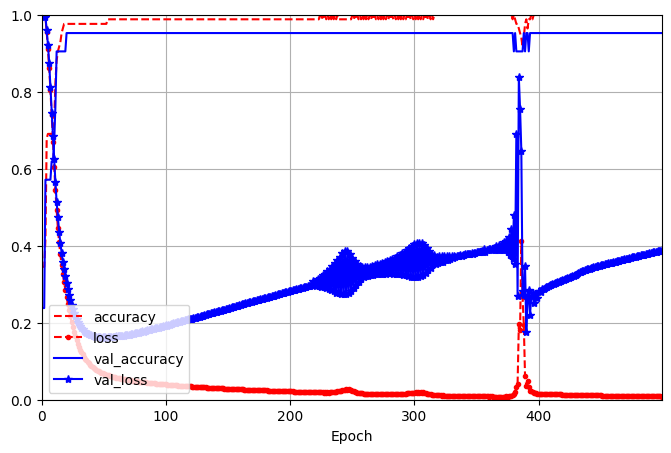

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

#Sets all random seeds (Python, NumPy, and TF)
tf.keras.utils.set_random_seed(421)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Get training history
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2)

# Plot losses and accuracies of each epoch
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 499], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

We can observe how initially the loss decreases rapidly and accuracy increases rapidly, both on the training and validation sets. This is the expected behavior. From around epoch 50 onwards, the loss continues to decrease slightly for the training dataset, but it starts to increase for the validation dataset. This is a symptom of overfitting; the model is starting to memorize the training dataset, which causes it to perform worse on the validation dataset. It would have probably been better to stop training before the validation loss started to increase. However, to assess the model's performance, it's best to use the test dataset, which has not been used at all (neither for training nor validation):

In [15]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9852 - loss: 0.0414 
Accuracy: 97.78


Let's stop training ant 50 epochs and assess the model's performance on the test dataset:

In [16]:
# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, input_dim=4, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Sets all random seeds (Python, NumPy, and TF)
tf.keras.utils.set_random_seed(421)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Get training history
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.3)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.3055 - loss: 1.4096 - val_accuracy: 0.7188 - val_loss: 1.0798
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5548 - loss: 1.0987 - val_accuracy: 0.5000 - val_loss: 1.0123
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6083 - loss: 0.9864 - val_accuracy: 0.6250 - val_loss: 0.9783
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6786 - loss: 0.9323 - val_accuracy: 0.6250 - val_loss: 0.9298
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6945 - loss: 0.8801 - val_accuracy: 0.6250 - val_loss: 0.8730
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6945 - loss: 0.8318 - val_accuracy: 0.6562 - val_loss: 0.8132
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7255 - loss: 0.7867 - val_accuracy: 0.7500 - val_loss: 0.7616
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7891 - loss: 0.7343 - val_accuracy: 0.6250 - val_loss: 0.7125
Epoch 9/50
5/5 ━

To be honest, the previous examples are somewhat artificial. To obtain that example, I used 421 as a seed. If you use the number we've always used as a seed (42), you'll qualitatively see a similar loss curve, though less pronounced. However, you won't see a difference in performance in the test dataset. Nevertheless, this behavior can occur on larger and more complex real datasets. When training a model, it is useful to inspect the behavior of the loss curves on the training and validation data to see if there are signs of overfitting.

### Troubleshooting  problems in the training (optional)

Let's now train the same model on the full iris dataset. This approach has the disadvantage that we do not have a data set to test the model. But besides that, as you can see from the loss and accuracy plots, something has gone seriously wrong with this training. Are you able to find the problem?. Hint: look closely at the documentation for validation_split.

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4095 - loss: 0.9267 - val_accuracy: 0.0000e+00 - val_loss: 3.1544
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7210 - loss: 0.7567 - val_accuracy: 0.0000e+00 - val_loss: 3.3950
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9597 - loss: 0.6367 - val_accuracy: 0.0000e+00 - val_loss: 3.5125
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9597 - loss: 0.5354 - val_accuracy: 0.0000e+00 - val_loss: 3.7025
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9597 - loss: 0.4575 - val_accuracy: 0.0000e+00 - val_loss: 3.6918
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9597 - loss: 0.3852 - val_accuracy: 0.0000e+00 - val_loss: 3.3779
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9597 - loss: 0.3232 - val_accuracy: 0.0000e+00 - val_loss: 3.0784
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9597 - loss: 0.2727 - val_accur

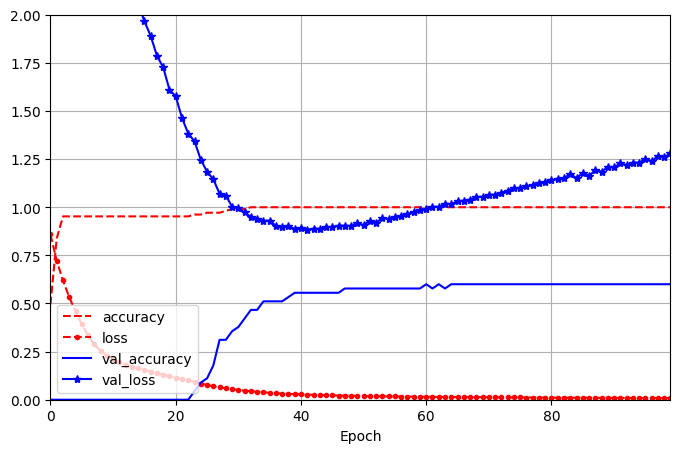

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Sets all random seeds (Python, NumPy, and TF)
tf.keras.utils.set_random_seed(42)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Get training history
history = model.fit(X, y, epochs=100, batch_size=16, validation_split=0.3)

# Plot losses and accuracies
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 2], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

# Using cross fold validation with Keras

When evaluating a Keras model using cross_val_score from scikit-learn, it is necessary to use **KerasClassifier** (or **KerasRegressor** in regression problems) because scikit-learn expects models to follow a specific interface for compatibility. KerasClassifier is a wrapper provided that makes a Keras model behave like a scikit-learn estimator, allowing it to integrate seamlessly with scikit-learn's utilities, such as cross-validation (cross_val_score). This wrapper enables the model to be passed to cross_val_score, which can then split the data into training and validation sets, fit the model, and compute evaluation metrics, all while ensuring compatibility between the Keras model and scikit-learn's functions. The first time we want to do yhis we will have to install the wrapper:

In [18]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

In order to use the wrapper we have to create a function that builds and compiles the model. This function will be the one we pass to KerasClassifier (note: due to some error in Colab, every time I run this notebook I get to this point I have to restart the execution environment, otherwise the following code gives an error. Maybe when you run this that problem will have been solved, but if not, you will have to restart the environment and I will re-run the code that loads the iris dataset):

In [19]:
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

# Function that builds and compiles the model
def create_model():
  # Create a sequential model
  model = Sequential([
    Input(shape =(4,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
  ])
  # Compile the model
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Create a KerasClassifier
model = KerasClassifier(model=create_model, epochs=100, batch_size=16, verbose=0)

# Define the K-fold cross-validator
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using K-fold cross-validation
results = cross_val_score(model, X, y, cv=kfold)

# Print the mean and sd
print('Accuracy:', results.mean(), '+-', results.std())

Accuracy: 0.9733333333333334 +- 0.04422166387140532


## Regression

Let's now train a regression model. We will use the California housing dataset:


In [20]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/housing.csv'

housing = pd.read_csv(url)

# Remove data from the housing dataset that has a class value greater than 49,999 (the truncated data)
housing = housing[housing['class'] <= 49.999]

housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    int64  
 4   NOX      490 non-null    float64
 5   RM       490 non-null    float64
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    int64  
 9   TAX      490 non-null    int64  
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  class    490 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 57.4 KB


Let's extract the features and the class:

In [21]:
X = housing.drop('class', axis=1)
y = housing['class']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    int64  
 4   NOX      490 non-null    float64
 5   RM       490 non-null    float64
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    int64  
 9   TAX      490 non-null    int64  
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 53.6 KB


We will train a neural network with 5 layers with 100 neurons each layer. The loss function will be the mean square error.


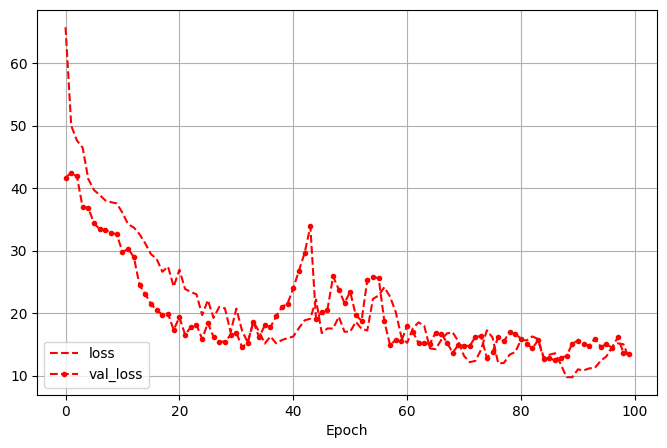

In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input

tf.keras.utils.set_random_seed(42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a sequential model
model = Sequential([
  Input(shape=(13,)),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model with 50 epochs and batch size of 16
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Plot losses
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

Let's compute the squared error over the test data:


In [23]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean Squared Error:', mse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Mean Squared Error: 12.920291441522469


Working with attributes with very different ranges complicates the convergence of neural network training algorithms. It is often a good idea to scale, typically by standaraizing, the attributes. Let's see what the result of training with the same number of epochs is for this data set after normalization:

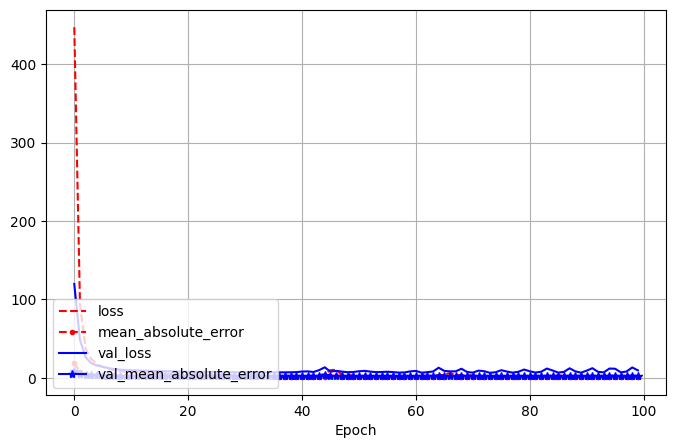

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Mean Squared Error: 9.728610157050245


In [24]:
from sklearn.preprocessing import StandardScaler

# Normalize data using StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

tf.keras.utils.set_random_seed(42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

# Create a sequential model
model = Sequential([
  Input(shape=(13,)),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model with 50 epochs and batch size of 16
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Plot losses
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean Squared Error:', mse)


You can see how the mean square error has dropped from 12.9 to 9.7 thanks to standardization.



Finally, let's see how to perform  a 10-fold validation using **KerasRegressor**:

In [25]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasRegressor

# Function that returns the model
def build_model():
  model = Sequential([
    Input(shape=(13,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)
  ])
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

# We use KerasRegressor
model = KerasRegressor(model=build_model, epochs=20, batch_size=32, verbose=0)

# Create the folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# PErform the 10-fold cross validation
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

print('Mean Squared Error:', -results.mean(), '+-', results.std())

Mean Squared Error: 23.99410801113446 +- 7.158222366673636


Let's repeat the 10-fold validation on the normalized data:

In [26]:

def build_model():
  model = Sequential([
    Input(shape=(13,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)
  ])
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

model = KerasRegressor(model=build_model, epochs=20, batch_size=32, verbose=0)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# We use X_norm instead of X
results = cross_val_score(model, X_norm, y, cv=kfold, scoring='neg_mean_squared_error')

print('Mean Squared Error:', -results.mean(), '+-', results.std())

Mean Squared Error: 9.011614709210034 +- 3.754972486890123


Notice how the error is now 9+-3.8, compared to 24+-7.2 when we did not normalize the data.

## Fasion

In [27]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train.shape

(55000, 28, 28)

In [28]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

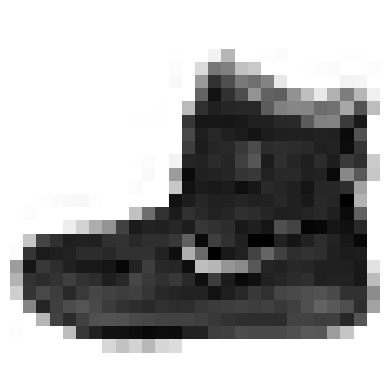

In [29]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [30]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

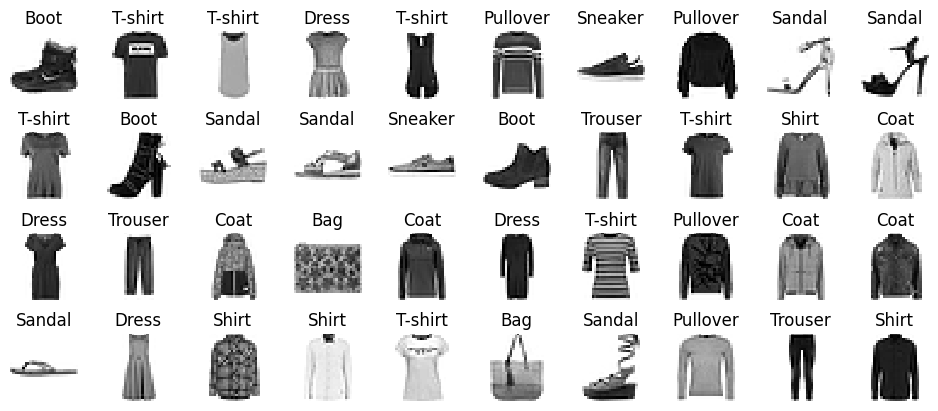

In [31]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6780 - loss: 1.0049 - val_accuracy: 0.8278 - val_loss: 0.5036
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8257 - loss: 0.5072 - val_accuracy: 0.8404 - val_loss: 0.4532
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8415 - loss: 0.4542 - val_accuracy: 0.8494 - val_loss: 0.4295
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8527 - loss: 0.4235 - val_accuracy: 0.8528 - val_loss: 0.4154
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8607 - loss: 0.4016 - val_accuracy: 0.8568 - val_loss: 0.4050
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8656 - loss: 0.3841 - val_accuracy: 0.8600 - val_loss: 0.3953
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8705 - loss: 0.3694 - val_accuracy: 0.8634 - val_loss: 0.3871
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8748 - loss: 0.35

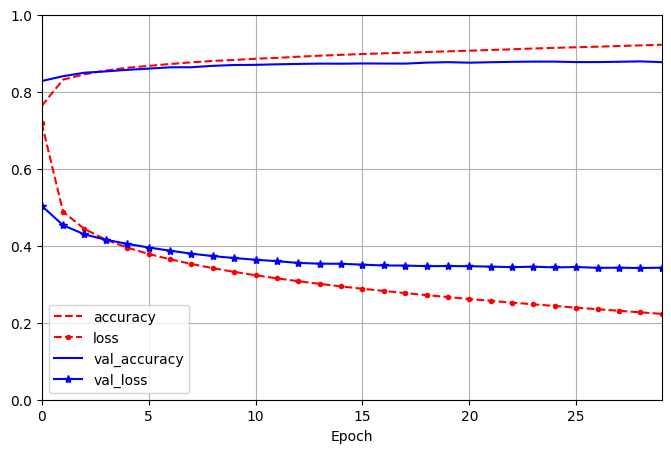

In [32]:
from tensorflow.keras.layers import Flatten

tf.random.set_seed(42)

model = tf.keras.Sequential([
  Input(shape=[28, 28]),
  Flatten(),
  Dense(300, activation="relu"),
  Dense(100, activation="relu"),
  Dense(10, activation="softmax")
  ])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")

plt.show()

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7491 - loss: 0.7047 - val_accuracy: 0.8276 - val_loss: 0.4483
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8533 - loss: 0.4014 - val_accuracy: 0.8570 - val_loss: 0.3824
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8691 - loss: 0.3523 - val_accuracy: 0.8638 - val_loss: 0.3697
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8804 - loss: 0.3229 - val_accuracy: 0.8652 - val_loss: 0.3627
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8879 - loss: 0.3007 - val_accuracy: 0.8736 - val_loss: 0.3456
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8952 - loss: 0.2818 - val_accuracy: 0.8672 - val_loss: 0.3705
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9003 - loss: 0.2678 - val_accuracy: 0.8674 - val_loss: 0.3744
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9068 - loss: 0.2539 -

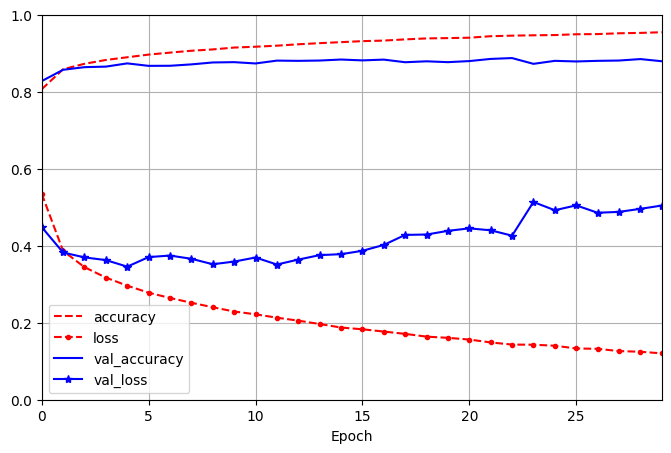

In [33]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(42)

model = tf.keras.Sequential([
  Input(shape=[28, 28]),
  Flatten(),
  Dense(300, activation="relu"),
  Dense(100, activation="relu"),
  Dense(10, activation="softmax")
  ])

sgd = SGD(learning_rate=0.1)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")

plt.show()

## LR

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.2925 - loss: 1.6072 - val_accuracy: 0.6667 - val_loss: 0.8949
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5668 - loss: 0.9329 - val_accuracy: 0.6667 - val_loss: 0.7521
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5622 - loss: 0.8655 - val_accuracy: 0.6667 - val_loss: 0.9968
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5391 - loss: 1.0811 - val_accuracy: 0.6667 - val_loss: 0.8825
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7127 - loss: 0.7462 - val_accuracy: 0.6667 - val_loss: 0.5550
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5946 - loss: 0.6964 - val_accuracy: 0.4444 - val_loss: 0.9074
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3458 - loss: 0.9830 - val_accuracy: 0.6667 - val_loss: 0.7904
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6872 - loss: 0.8378 - val_accuracy: 0.6667 - val_loss:

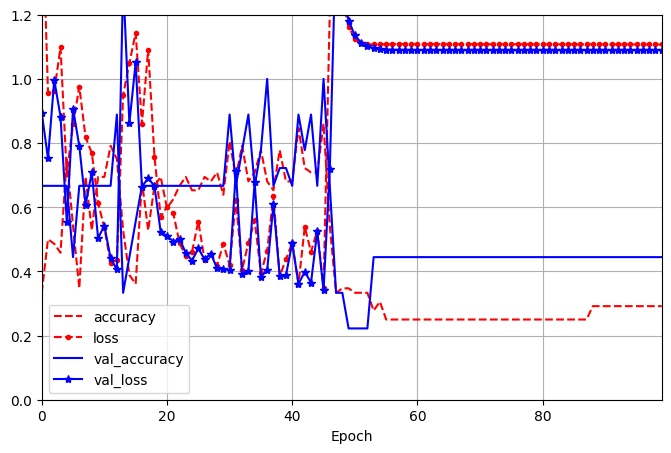

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3146 - loss: 1.1008 
Accuracy: 30.00


In [34]:
from tensorflow.keras.optimizers import SGD

#Sets all random seeds (Python, NumPy, and TF)
tf.keras.utils.set_random_seed(42)

url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/iris.csv'
iris = pd.read_csv(url)

# Encode labels
le = LabelEncoder()
iris['class'] = le.fit_transform(iris['class'])


# Split data into features (X) and labels (y)
X = iris.drop('class', axis=1)
y = iris['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Learning rate = 0.25
sgd = SGD(learning_rate=0.25)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Plot losses and accuracies of each epoch
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1.2], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

# Evaluate the mode
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3270 - loss: 1.2072 - val_accuracy: 0.2222 - val_loss: 1.1859
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3270 - loss: 1.1667 - val_accuracy: 0.2222 - val_loss: 1.1521
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3270 - loss: 1.1386 - val_accuracy: 0.2222 - val_loss: 1.1241
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4120 - loss: 1.1149 - val_accuracy: 0.6111 - val_loss: 1.1013
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5738 - loss: 1.0957 - val_accuracy: 0.6667 - val_loss: 1.0827
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6516 - loss: 1.0795 - val_accuracy: 0.6667 - val_loss: 1.0680
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6516 - loss: 1.0674 - val_accuracy: 0.6667 - val_loss: 1.0560
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6516 - loss: 1.0576 - val_accuracy: 0.6667 - val_loss: 1

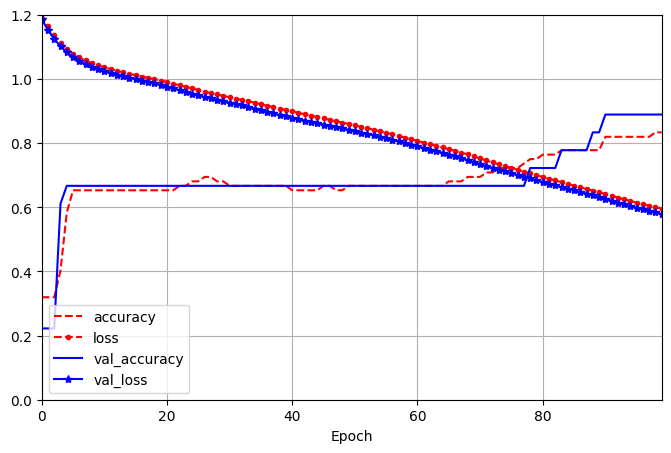

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8486 - loss: 0.5443 
Accuracy: 86.67


In [35]:
# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Learning rate = 0.25
sgd = SGD(learning_rate=0.0025)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Plot losses and accuracies of each epoch
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1.2], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

# Evaluate the mode
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2347 - loss: 1.1729 - val_accuracy: 0.4444 - val_loss: 1.0630
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3391 - loss: 1.0948 - val_accuracy: 0.4444 - val_loss: 1.0182
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3174 - loss: 1.0666 - val_accuracy: 0.4444 - val_loss: 0.9924
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3102 - loss: 1.0472 - val_accuracy: 0.4444 - val_loss: 0.9774
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3316 - loss: 1.0308 - val_accuracy: 0.4444 - val_loss: 0.9643
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3388 - loss: 1.0143 - val_accuracy: 0.4444 - val_loss: 0.9471
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4314 - loss: 0.9930 - val_accuracy: 0.4444 - val_loss: 0.9239
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4954 - loss: 0.9663 - val_accuracy: 0.6667 - val_loss: 0

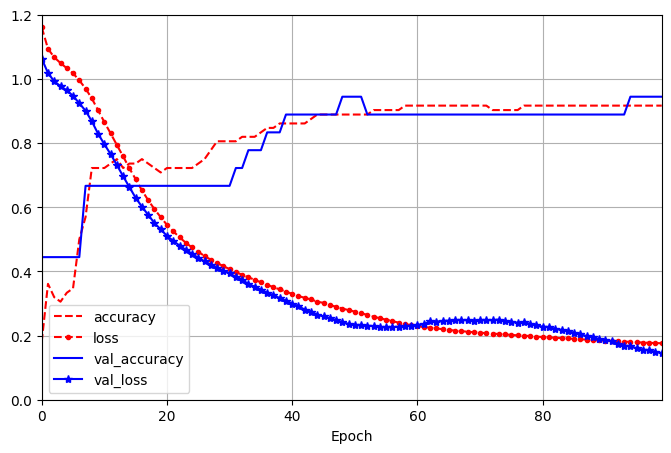

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8812 - loss: 0.2146 
Accuracy: 90.00


In [36]:
# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Learning rate = 0.25
sgd = SGD(learning_rate=0.02)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Plot losses and accuracies of each epoch
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1.2], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

# Evaluate the mode
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.2740 - loss: 1.4920 - val_accuracy: 0.9444 - val_loss: 0.7377
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7332 - loss: 0.7399 - val_accuracy: 0.6667 - val_loss: 0.4950
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6846 - loss: 0.5058 - val_accuracy: 1.0000 - val_loss: 0.3837
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8837 - loss: 0.3755 - val_accuracy: 0.9444 - val_loss: 0.2253
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8203 - loss: 0.3433 - val_accuracy: 0.6667 - val_loss: 0.5336
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7216 - loss: 0.7867 - val_accuracy: 0.8889 - val_loss: 0.3107
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8192 - loss: 0.3106 - val_accuracy: 0.8889 - val_loss: 0.2763
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8417 - loss: 0.3084 - val_accuracy: 1.0000 - val_loss: 0

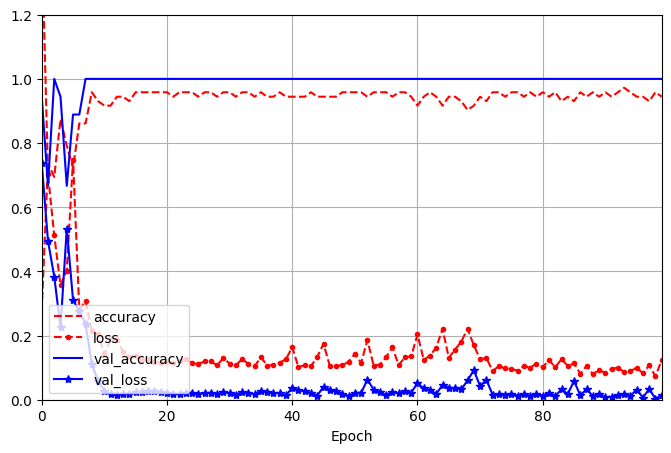

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9674 - loss: 0.0614 
Accuracy: 96.67


In [37]:
from tensorflow.keras.optimizers import Adam

# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Learning rate = 0.25
adam = Adam(learning_rate=0.02)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Plot losses and accuracies of each epoch
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1.2], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

# Evaluate the mode
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))